downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


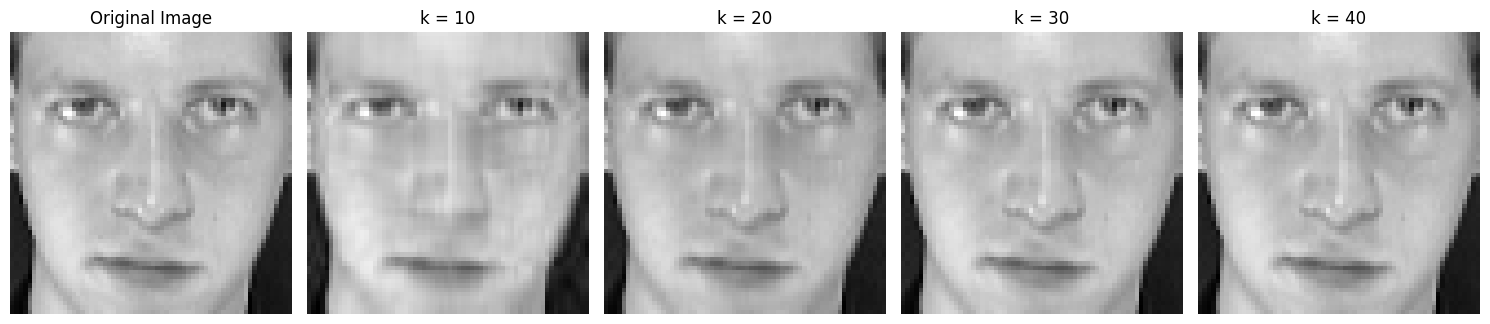

In [1]:
# Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank- 𝑘
#  approximations for  𝑘=10,20,30,40 .
#   You will find the imshow method in matplotlib useful for this; pass in cmap='gray' to render in grayscale. Feel free to play around further.

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets
from sklearn.decomposition import PCA


data = datasets.fetch_olivetti_faces()
images = data.images

# Returns the best rank-k approximation to M
def svd_reconstruct(M, k):
    U, s, Vt = np.linalg.svd(M, full_matrices=False)
    # Construct rank-k approximation using first k singular values/vectors
    A = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

    return A

sample_image = images[2]  # I choose the third image in the dataset
k_values = [10, 20, 30, 40]

# Create subplots
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 4))

# Display original image
axes[0].imshow(sample_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display reconstructed images for different k values
for i, k in enumerate(k_values):
    # Construct rank-k approximation
    A = svd_reconstruct(sample_image, k)

    # Display reconstructed image
    axes[i+1].imshow(A, cmap='gray')
    axes[i+1].set_title(f'k = {k}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()
